/home/liyuan3970/.local/lib/python3.7/site-packages/cartopy/util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


(73, 144, 12)
(73, 144, 12)


/home/liyuan3970/.local/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:773: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/home/liyuan3970/.local/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:820: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


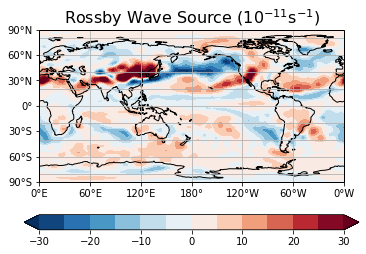

In [6]:


"""Compute Rossby wave source from the long-term mean flow.
This example uses the standard interface.
Additional requirements for this example:
* netCDF4 (http://unidata.github.io/netcdf4-python/)
* matplotlib (http://matplotlib.org/)
* cartopy (http://scitools.org.uk/cartopy/)
"""
%matplotlib inline
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point
import matplotlib as mpl
import matplotlib.pyplot as plt
from netCDF4 import Dataset

from windspharm.standard import VectorWind
from windspharm.tools import prep_data, recover_data, order_latdim
from windspharm.examples import example_data_path

mpl.rcParams['mathtext.default'] = 'regular'


# Read zonal and meridional wind components from file using the cdms2 module
# from CDAT. The components are defined on pressure levels and are in separate
# files.
ncu = Dataset(example_data_path('uwnd_mean.nc'), 'r')
uwnd = ncu.variables['uwnd'][:]
lons = ncu.variables['longitude'][:]
lats = ncu.variables['latitude'][:]
ncu.close()
ncv = Dataset(example_data_path('vwnd_mean.nc'), 'r')
vwnd = ncv.variables['vwnd'][:]
ncv.close()

# The standard interface requires that latitude and longitude be the leading
# dimensions of the input wind components, and that wind components must be
# either 2D or 3D arrays. The data read in is 3D and has latitude and
# longitude as the last dimensions. The bundled tools can make the process of
# re-shaping the data a lot easier to manage.
uwnd, uwnd_info = prep_data(uwnd, 'tyx')
vwnd, vwnd_info = prep_data(vwnd, 'tyx')

# It is also required that the latitude dimension is north-to-south. Again the
# bundled tools make this easy.
lats, uwnd, vwnd = order_latdim(lats, uwnd, vwnd)

# Create a VectorWind instance to handle the computations.
w = VectorWind(uwnd, vwnd)

# Compute components of rossby wave source: absolute vorticity, divergence,
# irrotational (divergent) wind components, gradients of absolute vorticity.
eta = w.absolutevorticity()
div = w.divergence()
uchi, vchi = w.irrotationalcomponent()
etax, etay = w.gradient(eta)

# Combine the components to form the Rossby wave source term. Re-shape the
# Rossby wave source array to the 4D shape of the wind components as they were
# read off files.
S = -eta * div - (uchi * etax + vchi * etay)
S = recover_data(S, uwnd_info)

# Pick out the field for December and add a cyclic point (the cyclic point is
# for plotting purposes).
S_dec, lons_c = add_cyclic_point(S[11], lons)

# Plot Rossby wave source.
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
clevs = [-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30]
fill = ax.contourf(lons_c, lats, S_dec * 1e11, clevs, cmap=plt.cm.RdBu_r,
                   transform=ccrs.PlateCarree(), extend='both')
ax.coastlines()
ax.gridlines()
ax.set_xticks([0, 60, 120, 180, 240, 300, 359.99], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True,
                                   number_format='.0f')
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
plt.colorbar(fill, orientation='horizontal')
plt.title('Rossby Wave Source ($10^{-11}$s$^{-1}$)', fontsize=16)
print(eta.shape)
print(uwnd.shape)
plt.show()


In [9]:
"""Compute Rossby wave source from the long-term mean flow.
This example uses the standard interface.
Additional requirements for this example:
* netCDF4 (http://unidata.github.io/netcdf4-python/)
* matplotlib (http://matplotlib.org/)
* cartopy (http://scitools.org.uk/cartopy/)
"""
%matplotlib inline
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point
import matplotlib as mpl
import matplotlib.pyplot as plt
from netCDF4 import Dataset

from windspharm.standard import VectorWind
from windspharm.tools import prep_data, recover_data, order_latdim
from windspharm.examples import example_data_path

mpl.rcParams['mathtext.default'] = 'regular'


# Read zonal and meridional wind components from file using the cdms2 module
# from CDAT. The components are defined on pressure levels and are in separate
# files.
f = Dataset('/home/liyuan3970/Data/data/meto_data/radar_typhoon_liqima/Radar.nc', 'r')
uwnd = f.variables['u'][:]
lons = f.variables['lon'][:]
lats = f.variables['lat'][:]
vwnd = f.variables['v'][:]
f.close()
uwnd, uwnd_info = prep_data(uwnd, 'tyx')
vwnd, vwnd_info = prep_data(vwnd, 'tyx')

# It is also required that the latitude dimension is north-to-south. Again the
# bundled tools make this easy.
lats, uwnd, vwnd = order_latdim(lats, uwnd, vwnd)

# Create a VectorWind instance to handle the computations.
w = VectorWind(uwnd, vwnd)

# Compute components of rossby wave source: absolute vorticity, divergence,
# irrotational (divergent) wind components, gradients of absolute vorticity.
eta = w.absolutevorticity()
div = w.divergence()
uchi, vchi = w.irrotationalcomponent()
etax, etay = w.gradient(eta)


ValueError: u and v cannot contain missing values